# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #Импортируем библиотеку

In [2]:
#Смотрим на первые 20 строк таблицы

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info() #Выводим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

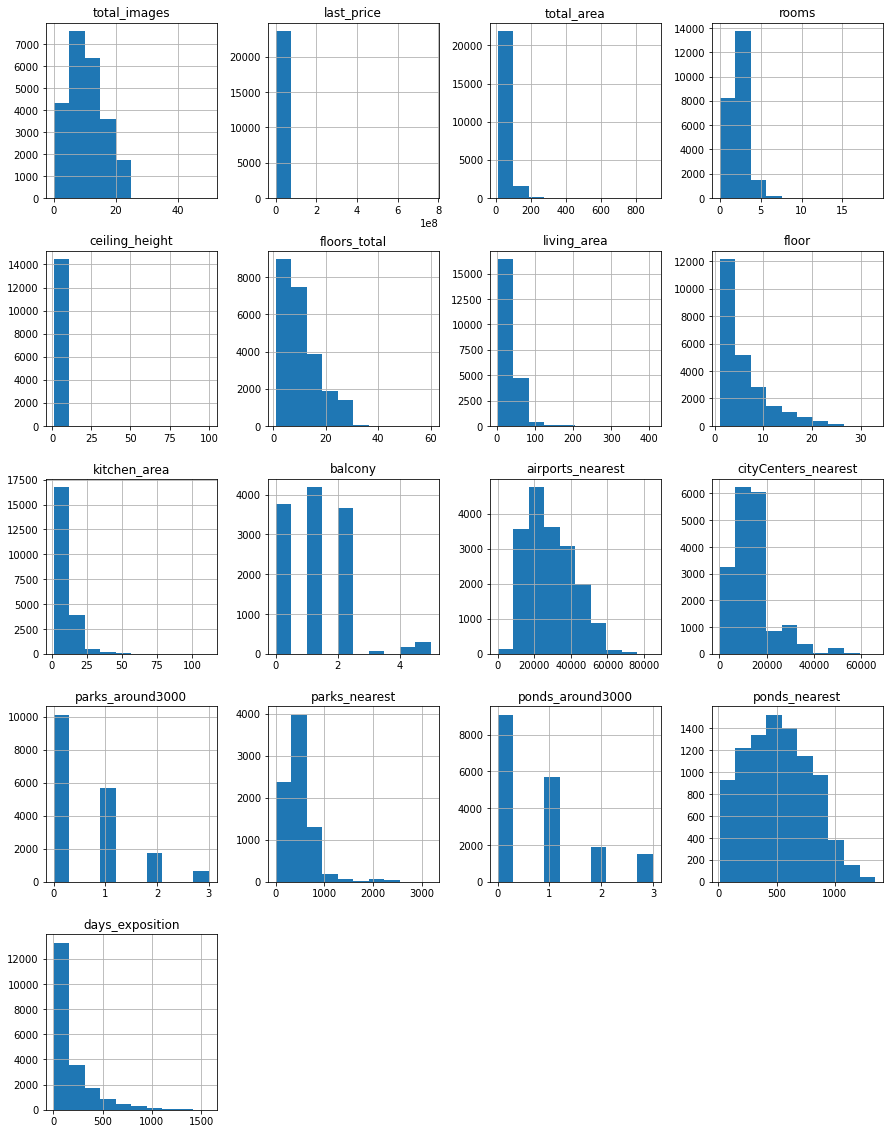

In [4]:
df.hist(figsize=(15, 20)); #Визуализируем, чтобы понять состояние данных

**Вывод:** По общей информации мы видим, что в данных достаточно много пропусков (например, в столбце `is_apartment` данных всего 2.775, против 23.699 в столбце `total_images`). Также есть столбцы с некоректными типами данных (тот же столбец `is_apartment` должен содержать в себе булев тип данных). Далее мы будем проводить предобработку данных.

## Предобработка данных

### Изучение и удаление пропусков

In [5]:
df.isna().sum() #Проверяем есть ли пропуски и в каких столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#Произведем замену там, где это возможно

columns_to_replace = ['balcony', 'parks_around3000', 'ponds_around3000']
for columns in columns_to_replace:
    df[columns] = df[columns].fillna(0)

Заменили данные значения на 0, так как скорее всего они не указаны, потому что балконов, парков в пределах 3 км и прудов в пределах 3 км нет.

In [7]:
df = df.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True) 

#Удалили эти пропуски из таблицы, так как они незначительно влияют на исследование 

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(False) 

#Заполнили данное значение на False, так как вероятно, что если не указано, что это апартаменты, значит это что-то иное

In [9]:
pd.options.display.float_format = '{:3f}'.format
df['last_price'].describe() 

# Заполняем пропуски в высоте потолков

count       23565.000000
mean      6540058.260004
std      10910934.721514
min         12190.000000
25%       3400000.000000
50%       4646000.000000
75%       6790000.000000
max     763000000.000000
Name: last_price, dtype: float64

In [10]:
#Разделили жилье на категории и теперь можем выяснить высоту потолков в определенных категориях
def price_for_ceilings(last_price): 
    if 1500000 <= last_price <= 5000000:
        return 'эконом'
    if 5000001 <= last_price <= 8000000:
        return 'комфорт'
    if 8000001 <= last_price <= 10000000:
        return 'бизнес'
    if 10000001 <= last_price <= 30000000:
        return 'элит'
    
df['category'] = df['last_price'].apply(price_for_ceilings)

In [11]:
df['ceiling_height'] = \
df['ceiling_height'].fillna(df.groupby('category')['ceiling_height'].transform('median')) 

#Заменяем пропущенные значения на медианные по категориям стоимости

In [12]:
df['living_area'] = \
df['living_area'].fillna(df.groupby('rooms')['living_area'].transform('median'))

#Заменили пропуски медианной площадью по количеству комнат

In [13]:
df.isna().sum() #Еще раз проверяем пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            439
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
category                  961
dtype: int64

Оставшиеся пропуски убрать на данном этапе либо очень сложно, либо невозможно. Оставшиеся пропуски в `ceiling_height` скорее всего выбивающиеся значения, далее избавимся от них (вряд ли квартира может стоить менее 1.500.000). Пропуски в `kitchen_area` убрать на данном этапе сложно, так как неизвестно как их расчитывать. Можно предположить, что от общей площади можно вычесть жилую площадь, но помимо кухни в общую площадь входят и другие помещения (туалет, коридор и тд). Пока просто зафиксируем. Пропуски во всех столбцах с `nearest` убрать невозможно, так как мы не можем предугадать расстояние. Была мысль убрать их групировкой по `locality_name`, но ведь данные могут получится далекими от реальности. Тем более сначала надо поработать с названиями этих населенных пунктов. По поводу высоты потолков я долго размышлял, как можно их расчитать и единственное логичное решение я увидел такое. Пропуски в `days_exposition` убрать нельзя, так как некоторые объявления на момент сбора статистики могли быть еще активными, может там много аномальных значений, далее проверим это.

По всем остальным пунктам я высказал свое мнения в ячейках с кодом.


Пропуски в данных появляются:

1. Совершенно случайно
* вероятность встретить пропуск не зависит ни от каких других значений. Пропуск может быть объяснен переменной, его легко восстановить;

2. Случайно
* вероятность пропуска зависит от других значений в наборе данных, но не от значений собственного столбца;

3. Не случайно
* вероятность пропуска зависит от других значений, в том числе и от значений собственного столбца.

### Проверяем типы данных

In [14]:
df.info() #Еще раз выведем инфо, чтобы посмотреть на типы данных в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23126 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [15]:
df['first_day_exposition'] = df['first_day_exposition'].astype('datetime64') 

#Поменяли тип данных c object на datetime64 для удобной работы с датой

In [16]:
change_type = ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for value in change_type:
    df[value] = df[value].astype(int)

#Поменяли тип данных в этих столбцах на int64, так как данные единицы могут выражаться только целыми числами

In [17]:
df.info() #Проверим изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23126 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Мы изменили типы данных в тех столбцах, где это было либо необходимо, либо удобно. В столбце `first_day_exposition` надо было поменять тип для дальнейшего удобства работы с ним. В остальных случаях типы данных были заменены с float64 на int64, так как данные значения не могут быть дробными числами. К примеру, не может быть 2.5 балконов или парков. Также можно поменять тип данных в столбце `days_exposition`, но там есть пропуски, которые не может обработать int64, конечно, можно заменить на Int64. Сделаем это дальше, если понадобится.

### Обработка неявных дубликатов

In [18]:
df['locality_name'].unique() #Выведем список всех уникальных значений в locality_name

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
import re #Избавились от неявных дубликатов. Оставили только названия населенных пунктов


df['locality_name'] = df['locality_name'].replace('посёлок', 'поселок', regex=True)

def only_upper(row):
    return re.sub(r'\b[а-я]+\s*', "", row['locality_name']).strip()

df['locality_name_short'] = df.apply(only_upper, axis=1)

df['locality_name_short'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Долго думал, как более верно убрать эти дубликаты, много чего перепробывал (и обычный replace() и тд), но решил остановится на этом варианте, тк он показался мне достаточно логичным. Я отбросил все подписи и оставил только имена личные. Согласен, что вариант не идеальный, но такое ощущение, что в данном проекте все сделано так, чтобы тебе пришлось чем-то жертвовать и выбирать наиболее оптимальный, по твоему мнению, вариант.

### Редкие и аномальные значения

In [20]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,23565.000000,23565.000000,23565.000000,23126.000000,23565.000000,23565.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6540058.260004,60.322824,2.070656,2.726541,10.675875,34.324899,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,10910934.721514,35.657060,1.078591,1.003343,6.594823,21.722006,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,12190.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400000.000000,40.000000,1.000000,2.570000,5.000000,18.400000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4646000.000000,52.000000,2.000000,2.600000,9.000000,30.300000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6790000.000000,69.700000,3.000000,2.750000,16.000000,42.700000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,763000000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Постараемся отфильтровать данные в нормальных значениях. `last_price` сделаем в пределах разумных значений 1.5 млн - 30 млн. `total_area` отфильтруем в соотвествии со всеми тенденциями: низ трогать не будем, верх сделаем 200 квадратов. Переходим к `rooms`. 0 комнат вряд ли может быть, да и судя по графикам больше 6(**объясню!** этот этап я делаю уже после того, как построил графики ниже и посмотрел выбросы, понимаю, что в конечной редакции этого уже не будет видно, потому что срезы я сделаю раньше. Но я не знаю как поступить иначе. Задание написано кривовато, поэтому делаю так) - это уже огромная редкость. Так что обозначим такие границы. Далее `ceiling_height`. Во-первых, мы знаем, что там есть значения, вписаные с ошибкой. Мы обработаем сначала их, а потом сделаем срез от 2 до 3 м. - это самые популярные значения. `floors_total` ограничим сверху 30 этажами, далее идут явные редкие значения. `living_area` минимум 12, максимум 80. `floor` сделаем максимум 30. `kitchen_area` судя по статистике максимум 30, далее идуч очень редкие значения. Наверно также уберем аномалии в `days_exposition` - вряд ли объявление будет висеть более 1 года.

In [21]:
df = df.loc[(df['last_price'] >= 1500000) & (df['last_price'] <= 30000000)]

In [22]:
df = df.loc[(df['total_area'] >= 12) & (df['total_area'] <= 200)]

In [23]:
df = df.loc[(df['rooms'] >= 1) & (df['rooms'] <= 6)]

In [24]:
df['ceiling_height'] = df['ceiling_height'].apply(lambda x: x * 0.1 if x > 25 else x)
df = df.loc[(df['ceiling_height'] >= 2) & (df['ceiling_height'] <= 3)]

In [25]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000,20978.000000,19170.000000,20978.000000,16240.000000,16259.000000,20978.000000,6774.000000,20978.000000,7810.000000,18352.000000
mean,9.855182,5518629.258414,56.274009,1.997521,2.652491,11.160835,31.867131,6.099438,10.114601,0.619268,29137.948337,14956.509256,0.428020,501.647623,0.552150,530.646095,175.114647
std,5.640592,3513080.651780,23.343680,0.929663,0.142469,6.624020,15.262732,4.977906,4.764469,0.975851,12987.919645,8410.893644,0.703840,347.350349,0.843683,277.876874,214.030315
min,0.000000,1500000.000000,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,399.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3480000.000000,40.000000,1.000000,2.570000,5.000000,18.100000,2.000000,7.000000,0.000000,18079.000000,10652.000000,0.000000,299.000000,0.000000,310.000000,44.000000
50%,9.000000,4550000.000000,51.000000,2.000000,2.600000,9.000000,30.000000,5.000000,9.000000,0.000000,27679.000000,13564.000000,0.000000,464.000000,0.000000,516.000000,92.000000
75%,14.000000,6300000.000000,66.275000,3.000000,2.700000,16.000000,41.000000,8.000000,11.500000,1.000000,38166.500000,16619.000000,1.000000,621.000000,1.000000,745.000000,221.000000
max,50.000000,30000000.000000,200.000000,6.000000,3.000000,60.000000,159.600000,33.000000,65.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Убрали достаточно много значений, но это не беда. Мы убрали достаточно сильно выделяющиеся значения. Как я писал выше я составлял графики до того, как провести фильтрацию, поэтому я смог сравнить и понять, что статистика не поменялась. А это говорит о том, что мы действительно убрали только выбросы, а оснонвые значения, пригодные для анализа, остались неизменными.

## Посчитайте и добавьте в таблицу новые столбцы

In [26]:
df['price_1m2'] = df['last_price'] / df['total_area'] #Стоимость 1 квадратного метра

In [27]:
df['publication_day_of_week'] = df['first_day_exposition'].dt.weekday #День недели публикации

In [28]:
df['publication_month'] = df['first_day_exposition'].dt.month #Месяц публикации

In [29]:
df['publication_year'] = df['first_day_exposition'].dt.year #Год публикации

In [30]:
def type_of_floor(df): #Обозначили тип этажа квартиры через функцию
    if df.floor == 1:
        return 'первый'
    elif df.floor == df.floors_total:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(type_of_floor, axis=1)

In [31]:
df['cityCenters_km'] = df['cityCenters_nearest'] / 1000 #Расстояние до центра в км
df['cityCenters_km'] = df['cityCenters_km'].round()

Добавили новые столбцы, для более подробного описания характеристик помещений.

## Проведите исследовательский анализ данных

### Изучаем параметры объектов

count   20978.000000
mean       56.274009
std        23.343680
min        12.000000
25%        40.000000
50%        51.000000
75%        66.275000
max       200.000000
Name: total_area, dtype: float64


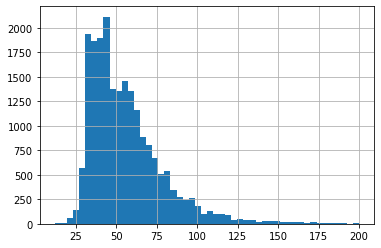

In [32]:
print(df['total_area'].describe())
df['total_area'].hist(bins=50);

По гистограмме видно, что основная часть опубликованной недвижимости имеет общую площадь около 50 кв.м. (около двух тысяч объявлений). Квартир с площадью примерно 100 кв.м. уже примерно в несколько раз меньше.

count   20978.000000
mean       31.867131
std        15.262732
min         2.000000
25%        18.100000
50%        30.000000
75%        41.000000
max       159.600000
Name: living_area, dtype: float64


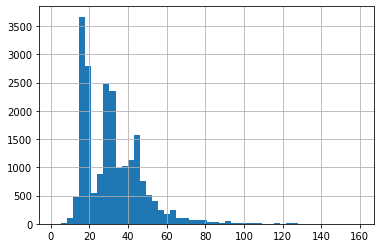

In [33]:
print(df['living_area'].describe())
df['living_area'].hist(bins=50);

Основная часть помещений имеет жилую площадь около 30 кв.м. Что интересно квартир с жилой площадью на 10 кв.м. больше уже 2 раза меньше. Есть также бум около 20 кв. м. скорее всего это студии. Они стали популярны последнее время.

count   19170.000000
mean       10.114601
std         4.764469
min         1.300000
25%         7.000000
50%         9.000000
75%        11.500000
max        65.000000
Name: kitchen_area, dtype: float64


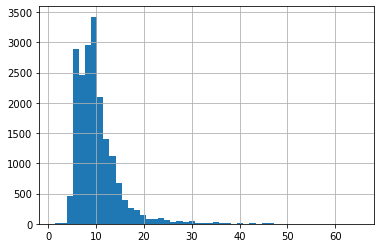

In [34]:
print(df['kitchen_area'].describe())
df['kitchen_area'].hist(bins=50);

Большинство кухонь имеют площадь около 10 кв.м. Владельцев кухонь с площадью в 20 кв.м. примерно в 10 раз меньше.

count      20978.000000
mean     5518629.258414
std      3513080.651780
min      1500000.000000
25%      3480000.000000
50%      4550000.000000
75%      6300000.000000
max     30000000.000000
Name: last_price, dtype: float64


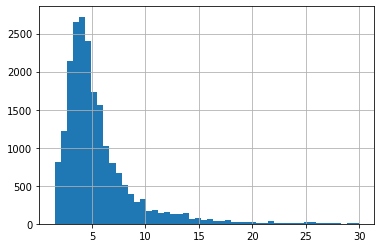

In [35]:
print(df['last_price'].describe())
(df['last_price'] / 1000000).hist(bins=50);

Большая часть квартир продается в ценовом диапозоне от 3.5 млн до 5 млн.

count   20978.000000
mean        1.997521
std         0.929663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


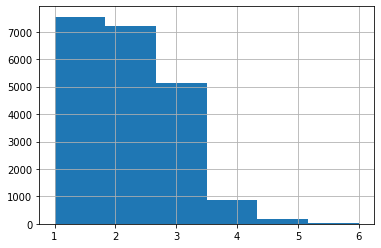

In [36]:
print(df['rooms'].describe())
df['rooms'].hist(bins = df['rooms'].max());

Основная часть квартир имеет 2 комнаты. Также огромное количество однокомнатных квартир, а вот квартир с 3+ комнатами совсем мало.

count   20978.000000
mean        2.652491
std         0.142469
min         2.000000
25%         2.570000
50%         2.600000
75%         2.700000
max         3.000000
Name: ceiling_height, dtype: float64


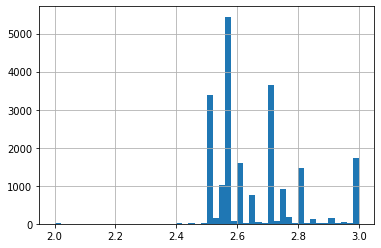

In [37]:
print(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=50);

Большая часть квартир имеет потолки высотой примерно 2.5 метра.

count   20978.000000
mean        6.099438
std         4.977906
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        33.000000
Name: floor, dtype: float64


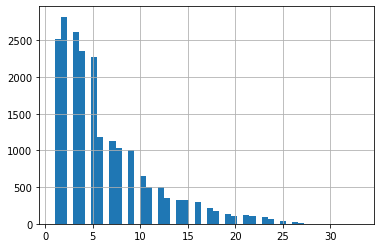

In [38]:
print(df['floor'].describe())
df['floor'].hist(bins=50);

Больше всего квартир продается на 1-5 этажах. Далее идет сильный спад. Это логичное, если учесть, что в Питере есть ограничения на высоту зданий.

count      20978
unique         3
top       другой
freq       15706
Name: floor_type, dtype: object


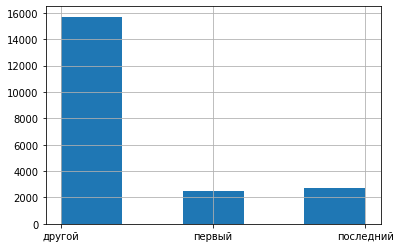

In [39]:
print(df['floor_type'].describe())
df['floor_type'].hist(bins=5);

Тут все логично. Квартир на промежуточных этажах явно будет больше, чем на первом и последнем. А вот что интересно, так это то, что квартир на первом и последнем этажах почти одинаково.

count   20978.000000
mean       11.160835
std         6.624020
min         1.000000
25%         5.000000
50%         9.000000
75%        16.000000
max        60.000000
Name: floors_total, dtype: float64


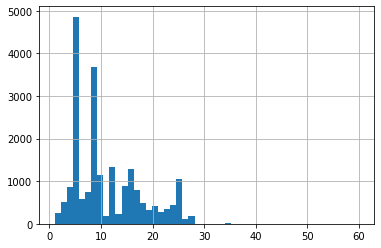

In [40]:
print(df['floors_total'].describe())
df['floors_total'].hist(bins=50);

В основном дома, в которых продаются помещения, имеют около 9 этажей, но самый популярный вариант - 5 этажей. Опять же все упирается в ограничения по высоте.

count   16259.000000
mean    14956.509256
std      8410.893644
min       399.000000
25%     10652.000000
50%     13564.000000
75%     16619.000000
max     65968.000000
Name: cityCenters_nearest, dtype: float64


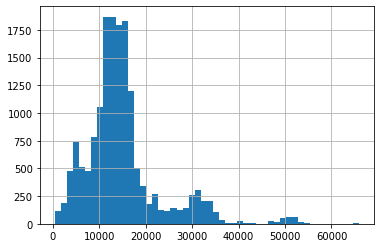

In [41]:
print(df['cityCenters_nearest'].describe())
df['cityCenters_nearest'].hist(bins=50);

Основная часть помещений находся на расстоянии в 10-15 км от центра. В целом логично, ведь область активно застраивается, а найти квартиру в центре все сложнее.

count   16240.000000
mean    29137.948337
std     12987.919645
min         0.000000
25%     18079.000000
50%     27679.000000
75%     38166.500000
max     84869.000000
Name: airports_nearest, dtype: float64


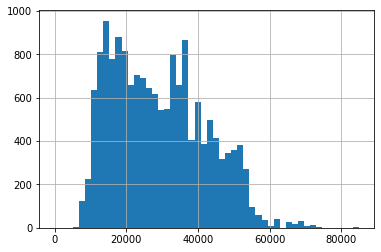

In [42]:
print(df['airports_nearest'].describe())
df['airports_nearest'].hist(bins=50);

Здесь мы имеем достаточно большой разброс, но в целом можно определить, что большая часть помещений находится в 20-30 км от ближайшего аэропорта.

count   6774.000000
mean     501.647623
std      347.350349
min        1.000000
25%      299.000000
50%      464.000000
75%      621.000000
max     3190.000000
Name: parks_nearest, dtype: float64


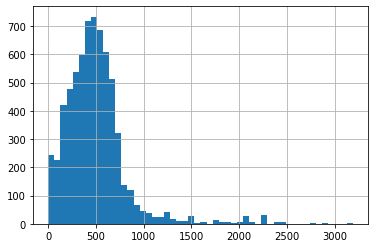

In [43]:
print(df['parks_nearest'].describe())
df['parks_nearest'].hist(bins=50);

Получается, что в Питере и области достаточно много парков. Каждая квартира имеет ближайший парк примерно в 450 метрах!

count   20978.000000
mean        2.565307
std         1.794583
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: publication_day_of_week, dtype: float64


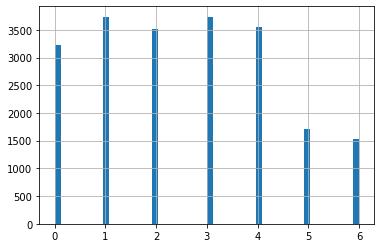

In [44]:
print(df['publication_day_of_week'].describe())
df['publication_day_of_week'].hist(bins=50);

Больше всего объявлений выкладывают по вторникам и четвергам. Заметно меньше по выходным.

count   20978.000000
mean        6.409334
std         3.493018
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        12.000000
Name: publication_month, dtype: float64


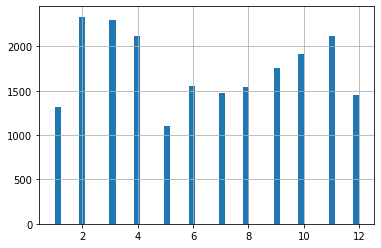

In [45]:
print(df['publication_month'].describe())
df['publication_month'].hist(bins=50);

Рост продаж квартир приходится на начало и конец года. Интересно почему?

Мы визуализировали данные и нашли интересные факты. Полноценные выводы делать рано, но суть происходящего стала яснее. Работаем дальше.

### Изучение динамики продажи квартир

count   18352.000000
mean      175.114647
std       214.030315
min         1.000000
25%        44.000000
50%        92.000000
75%       221.000000
max      1580.000000
Name: days_exposition, dtype: float64


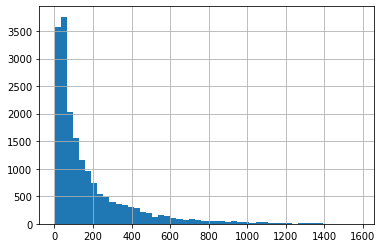

In [46]:
print(df['days_exposition'].describe())
df['days_exposition'].hist(bins=50);

В целом по графику и выведенной информации все видно. Объявления в среднем продаются до 75 дней, так нам говорит медиана. Она более устойчива к различным большим значениям. Среднее говорит о продаже квартир в целом до 105 дней. Разница примерно в месяц, но я бы больше верил медиане. Также по графику видно, что большая часть квартир вообще продается в период до 30-40 дней. То есть исходя из всего, можно сделать вывод, что пары месяцев достаточно, чтобы продать квартиру.

### Факторы влияющие на общую стоимость объекта 

In [47]:
import matplotlib.pyplot as plt

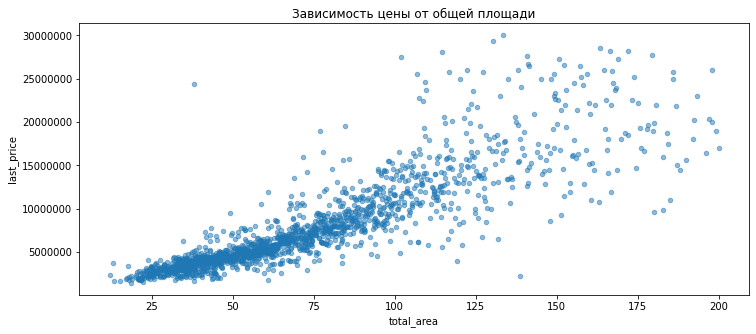

In [48]:
pivot_total = df.pivot_table(index='total_area', values='last_price').reset_index()

pivot_total.plot(
     x='total_area',
     y='last_price',
     title='Зависимость цены от общей площади',
     rot=0,
     alpha=0.5,
     kind='scatter',
     figsize=(12, 5),
);
plt.ticklabel_format(axis='y', style='plain')

In [49]:
df['last_price'].corr(df['total_area'])

0.7758034153315482

Значений очень много, а я так и не разобрался как сделать так, чтобы значения по оси х было видно :/. Но в целом видно, что зависимость есть: чем больше площадь, тем больше и цена, но также видим, что внутри групп есть и исключения (когда площадь больше, но цена ниже). Это бывает, но на тенденцию особо не влияет. Корреляция достаточно сильная.

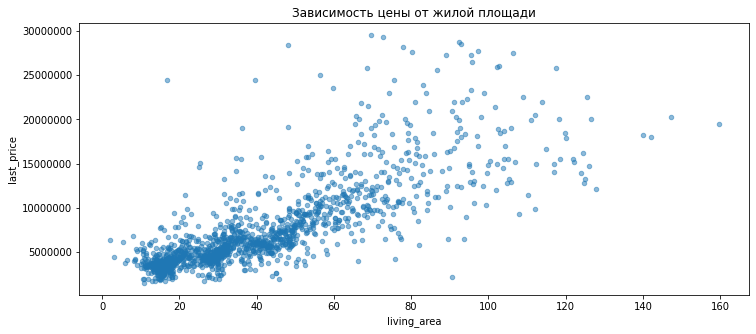

In [50]:
pivot_total = df.pivot_table(index='living_area', values='last_price').reset_index()

pivot_total.plot(
     x='living_area',
     y='last_price',
     title='Зависимость цены от жилой площади',
     rot=0,
     alpha=0.5,
     kind='scatter',
     figsize=(12, 5),
);
plt.ticklabel_format(axis='y', style='plain')

In [51]:
df['last_price'].corr(df['living_area'])

0.6209710338458658

Та же проблема. Но кстати не особо видно явной связи между ценой и жилой площадью, она есть, но достаточно мизерная.

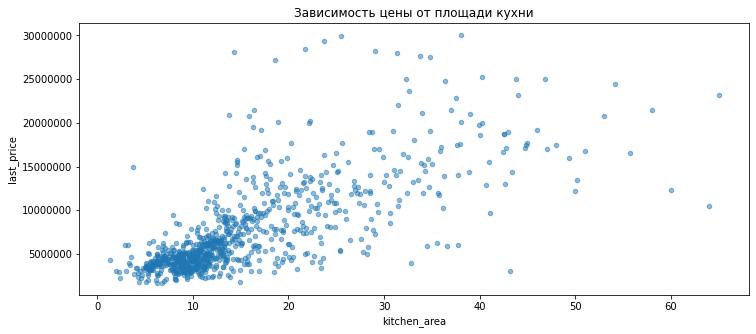

In [52]:
pivot_total = df.pivot_table(index='kitchen_area', values='last_price').reset_index()

pivot_total.plot(
     x='kitchen_area',
     y='last_price',
     title='Зависимость цены от площади кухни',
     rot=0,
     alpha=0.5,
     kind='scatter',
     figsize=(12, 5),
);
plt.ticklabel_format(axis='y', style='plain')

In [53]:
df['last_price'].corr(df['kitchen_area'])

0.5955419656997333

Зависимость цены от площади кухни тоже не такая явная.

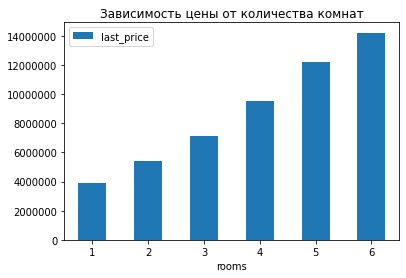

In [54]:
pivot_total = df.pivot_table(index='rooms', values='last_price').reset_index()

pivot_total.plot(
     x='rooms',
     y='last_price',
     title='Зависимость цены от количества комнат',
     rot=0,
     kind='bar',
);
plt.ticklabel_format(axis='y', style='plain')

In [55]:
df['last_price'].corr(df['rooms'])

0.4671390391500344

По графику видно, что присутствует яркая прямая зависимость цены от количества комнат. Чем их больше, тем выше цена. Я уверен, что есть примеры, когда комнат меньше, но цена больше. Но в целом тенденция такая, как на графике.

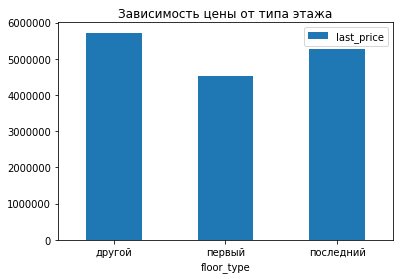

In [56]:
pivot_total = df.pivot_table(index='floor_type', values='last_price').reset_index()

pivot_total.plot(
     x='floor_type',
     y='last_price',
     title='Зависимость цены от типа этажа',
     rot=0,
     kind='bar',
);
plt.ticklabel_format(axis='y', style='plain')

Сложно определить какую-то зависимость, но можно заметить, что цена квартир на первом этаже, как правило, ниже. Недавно изучал подобную ифнормацию - это правда, квартиры на первых этажах чуть дешевле.

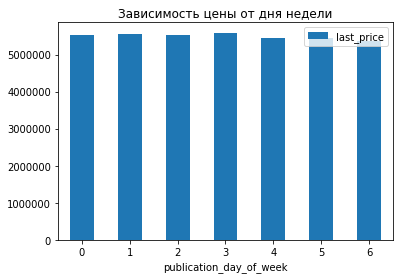

In [57]:
pivot_total = df.pivot_table(index='publication_day_of_week', values='last_price').reset_index()

pivot_total.plot(
     x='publication_day_of_week',
     y='last_price',
     title='Зависимость цены от дня недели',
     rot=0,
     kind='bar',
);
plt.ticklabel_format(axis='y', style='plain')

Вот здесь можно четко сказать, что зависимости цены от дня недели публикации объявления нет!

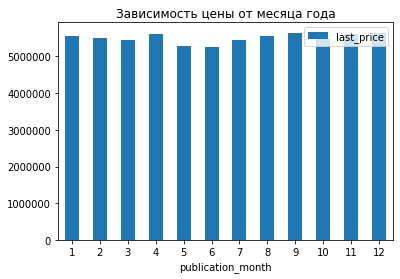

In [58]:
pivot_total = df.pivot_table(index='publication_month', values='last_price').reset_index()

pivot_total.plot(
     x='publication_month',
     y='last_price',
     title='Зависимость цены от месяца года',
     rot=0,
     kind='bar',
);
plt.ticklabel_format(axis='y', style='plain')

То же самое и про месяц.

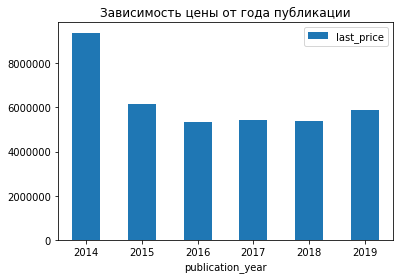

In [59]:
pivot_total = df.pivot_table(index='publication_year', values='last_price').reset_index()

pivot_total.plot(
     x='publication_year',
     y='last_price',
     title='Зависимость цены от года публикации',
     rot=0,
     kind='bar',
);
plt.ticklabel_format(axis='y', style='plain')

Год туда же.

Это исследование было достаточно показтельным, хотя где-то в глубине души я догадывался, что будет очень сильная связь цены и общей площади. Графики и корреляция это подтверждают. Было интересно и сложно, но больше интересно.

### Средняя цена 1 кв.м.

In [60]:
locality_pivot = df.pivot_table(index='locality_name_short', values='price_1m2', aggfunc=('mean', 'count'))
locality_pivot = locality_pivot.sort_values(by='count', ascending=False)
locality_pivot.head(10)
#Сделаем сводную таблицу с количеством объявлений и средней стоимостью квадратного метра

,count,mean
locality_name_short,,
Санкт-Петербург,13916,109182.867174
Мурино,559,85469.354687
Кудрово,449,95083.103822
Шушары,434,78254.497583
Всеволожск,383,68887.339181
Пушкин,347,102298.577380
Колпино,327,75375.283038
Парголово,322,90448.423806
Гатчина,296,69382.233570


Здесь показаны 10 населенных пунктов с наибольшим количеством объявлений и средней стоимостью за 1 кв.м. Достаточно логично, что Питер будет сильно отличаться от области.

In [61]:
locality_pivot = locality_pivot.sort_values(by='mean', ascending=False)
locality_pivot.head(10)

,count,mean
locality_name_short,,
Санкт-Петербург,13916,109182.867174
Зеленогорск,23,106043.631251
Бор,1,105539.261570
Репино,4,104238.614786
Пушкин,347,102298.577380
Сестрорецк,176,101018.230338
Лисий Нос,3,100660.814239
Мистолово,11,98549.976709
Левашово,1,96997.690531


Здесь выделены 10 населеных пунктов с самым дорогим квадратным метром.

In [62]:
locality_pivot = locality_pivot.sort_values(by='mean')
locality_pivot.head(10)

,count,mean
locality_name_short,,
Бокситогорск,1,19230.769231
Никольский,1,20862.308762
Сланцы,5,22378.697637
Пикалёво,1,22458.628842
Пижма,1,22641.509434
Извара,1,24038.461538
Возрождение,2,26893.661363
Шпаньково,1,27352.941176
Красносельское,1,27419.354839


Здесь выделены 10 населеных пунктов с самым дешевым квадратным метром.

Сделаем краткий вывод. Логично, что в Питере больше всего объявлений и что там самы дорогой квадратный метр. Дальше по сводным таблицам хорошо видно, как разнится стоимость в зависимости от населеного пункта.

### Цена каждого километра

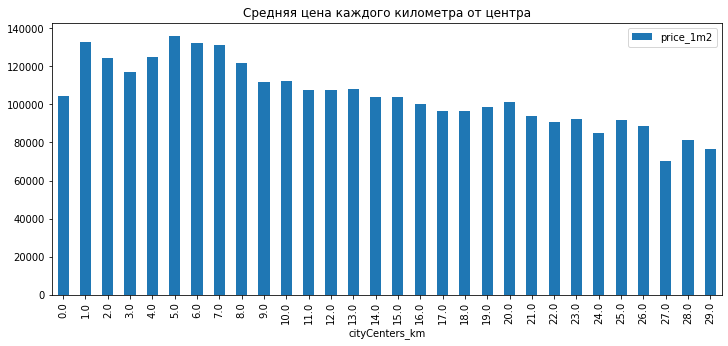

In [63]:
df_km = df.loc[df['locality_name_short'] == 'Санкт-Петербург']

df_km = df_km.pivot_table(index='cityCenters_km', values='price_1m2', aggfunc='mean')

df_km.plot(
     title='Средняя цена каждого километра от центра',
     rot=90,
     kind='bar',
     figsize=(12, 5),
);

Как мы видим по графику стоимость километра действительно падает в процессе удаления от центра. Но на стоимость километра влиятет не только квадратура, но и остальные показатели.

## Общий вывод

Проект был очень объемный и интересный. 


* Мы выполнили предобработку данных:

1. Нашли пропуски и обработали их (удалили там, где было возможно; заменили, где смогли; оставили пропуски, которые не смогли заменить);

2. Обработали дубликаты названий населеных пунктов и приведи их к единому виду;

3. Изменили типы данных там, где это было нужно сделать;

4. Нашли и убрали аномальные или сильно выбивающиеся значения (наши данные уменьшились, но статистика стала качественней).

* Дополнили таблицу вспомогательной информацией и визуализировали ее, чтобы посмотреть на данные:

1. Большая часть опубликованных помещений имеет общую площадь 30-50 кв.м.;

2. В основном жилая площадь помещений равняется 30-40 кв. м.;

3. Кухни имеют как правило размер около 10 кв.м;

4. Основная часть помещений проадется в диапозоне между 3.5 и 5 млн руб.;

5. Комнат в основном до 3;

6. Чаще всего встречаются потолки высотой 2.5 метра;

7. Чаще всего встречаются 5 этажные и 9 этажные дома (это обусловлено особенностями застройки Питера);

8. В среднем помещения находятся на расстоянии 10-15 км от центра;

9. Ближайший аэропорт располагается как правило в 20-30 км;

10. А парки наоборот очень близко - 450 метров;

11. Чаще всего объявления выкладывают по вторникам и четвергам в начале и конце года.

* Изучили их, нашли интересные особенности и зависимости, которые существуют на рынке недвижимости:

1. В среднем квартиры в Питере и области продаются около 3 месяцев;

2. Общая площадь помещения больше всего влияет на его стоимость;

3. Стало известно, что квартиры на 1 этаже стоят как правило дешевле остальных;

4. День, месяц, год публикации вообще не влияет на стоимость помещения;

5. Больше всего объявлений размещено в Питере, а также там один из самых дорогих квадратных метров;

6. Самый дешевый квадртаный метр в Лен. области в городе Бокситогорск;

7. Километр действительно дешевеет в зависимости от удаления от центра.
